# Simulation Analysis and Its Application in Python

As the complexity of the problem grows, so does the need to compute it. However, it is not always possible to have a real-world data or real-world condition in which all conditions are met. For instance, suppose we think there is a correlation and randomness in the data and we would like to figure out what happens if we have correlation and randomness, this is the point where `Simulation` comes into the stage. 


Simulation characterizes this enviroment and enable us to understand what would happen if we have correlation and randomness in the data? Differently, by simulation, we are able to comprehend different course of actions. Furthermore, it provides valuable insights about likely changes and enable us to validate the model accordingly. So, simulation imitates the real-world situations in a more stylized environment. 

In this lesson, we will learn the following:
* Monte Carlo Simulation
* Stock Price Simulation via Monte Carlo Simulation

## Monte Carlo Simulation

The Monte Carlo methods are basically a class of computational algorithms that rely on repeated random sampling to obtain certain numerical results, and can be used to solve problems that have a probabilistic interpretation.

Analytical solution does not always exist and this is a real problem in finance and in other fields as well. `Monte Carlo` simulation is an attempt to attack this problem. It is a numerical method that makes use of random number to find an approximate solution. The history of Monte Carlo dates back to 1940 when Manhattan Project was in the process (Malvin et al., 2008):

"Fermi in the 1930s had done work regarding Monte Carlo as way of approximation but it was a highly rigorous and time consuming and failed to gain traction. In the 1940s when he met with John Von Neumann the combination of Fermi’s approximation method and Von Neumann’s computer knowledge where able to use it calculate approximations with high degree of accuracy. In modern finance it is used as financial concepts have got more complicated to be able to approximate accurate financial scenarios." 

In principle, Monte Carlo simulation takes advantage of `Law of Large Number` and `Central Limit Theorem`. Let's discuss these two concepts first and highlight the importance for Monte Carlo Simulation.

### Law of Large Numbers

The Law of Large Numbers has an important place in both Statistics / Probability and Machine Learning. This theorem reveals that the sample obtained by taking more samples represents the population better.

According to the law of large numbers, as the sample size grows, the average of the sample approaches the average of the population. This approach tells us the importance of sample size. Simply, the larger the sample size, the better the representative sample population.



The Law of Large Numbers is very simple: as the number of samples with a uniform distribution and randomly selected variables increases, the sample mean approaches the theoretical average.



So, the `Law of Large Number` stresses the importance of large sample size. Accordingly, as we increase the number of sample size, the sample mean becomes very close to the population mean.The Law of Large Numbers therefore explains why casinos make money in the long run.

The law of large numbers guarantees convergence for the Monte Carlo Method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from numpy.random import randint
import yfinance as yf
import seaborn as sns; sns.set()

In [2]:
sample = []
sample_means = []
for number_shots in range(1,2000):
    shot = np.random.randint(low=1,high=7, size=1)[0]
    sample.append(shot)
    sample_means.append(np.mean(sample))

In [3]:
print(sample[0:10])
print(sample_means[0:10])

[2, 4, 5, 4, 1, 5, 5, 2, 3, 4]
[2.0, 3.0, 3.6666666666666665, 3.75, 3.2, 3.5, 3.7142857142857144, 3.5, 3.4444444444444446, 3.5]


In [4]:
def sample_plot(sample_means,sample_size, subplot_no):
    plt.subplot(subplot_no)
    plt.hlines(3.5, 0, sample_size, colors= 'r' )
    plt.plot(sample_means[0:sample_size])
    plt.ylim((1,6))
    plt.title("Sample Size = {}".format(sample_size))
    plt.xlabel("Sample Size")
    plt.ylabel("Sample Mean")
    return plt

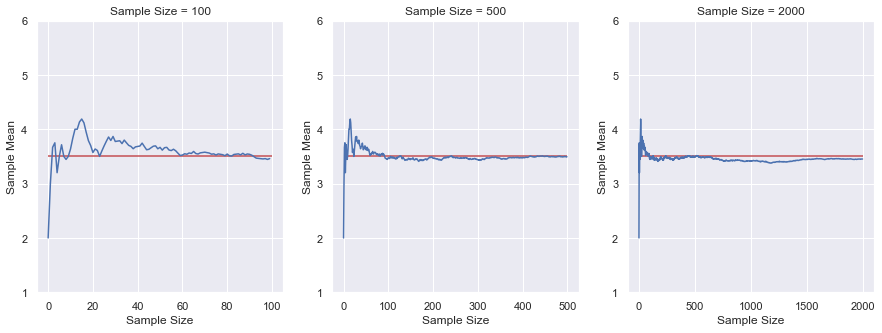

In [5]:
plt.figure(figsize=(15,5))
sample_plot(sample_means,100, 131) 
sample_plot(sample_means, 500, 132)
sample_plot(sample_means, 2000, 133)
plt.show()

### Central Limit Theorem

The `central limit theorem` states that, irrespective of the distribution we have at first, if we take sufficiently large random samples (n>30) from the population with replacement, then the distribution of the sample means will be approximately normally distributed. 

In the context of simulation, the `central limit theorem` tells us that the distribution of the errors will converge to a normal distribution so that we can figure out the number of times we need to resample to achieve a certain accuracy. 



By assuming normal distribution of the errors, we have information to calculate the confidence interval and see what sample size is needed for the desired accuracy.

Mathematically, the CLT states that:

$$\alpha_i\xrightarrow[]{D}\alpha +\frac{\sigma}{\sqrt{n}}\mathbb{N}(0,1)$$

where D denotes convergence in distribution.

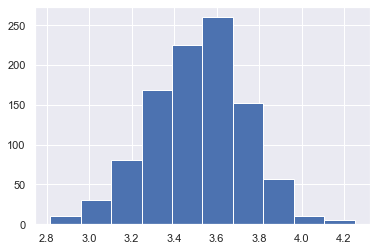

DescribeResult(nobs=1000, minmax=(2.816666666666667, 4.25), mean=3.507883333333333, variance=0.047744208375041716, skewness=-0.1219240527814335, kurtosis=0.02695348847491985)


In [6]:
means = [np.mean(randint(1, 7, 60)) for _ in range(1000)]

plt.hist(means)
plt.show()

print(stats.describe(means))

Let $X_1, X_2,\cdots..X_n$ are independent and identically distributed random variables and f(x) is a real-valued function. Then, Law of Large Number states that:

$$\mathbb{E}(f(X))\approx\frac{1}{N}\sum_i^N f(X_i)$$

In a nutshell, Monte Carlo simulation is nothing but generating random samples and calculating its mean. Computationally, it follows the following steps:

* Define the domain
* Generate random numbers
* Iteration and aggregation the result

Determination of $\pi$ is a toy but illustrative example for Monte Carlo application. Let's start with it.

Suppose we have a circle with radius r = 1 and area=4. Area of a circle is $\pi$ and area of a square in which we try to fit circle is 4. The ratio turns out to be:

$$\frac{\pi}{4} (eq.1) $$

To leave $\pi$ alone, the proportion between circle and area can be defined as:

$$\frac{Circumference_{circle}}{Area_{square}}=\frac{m}{n} (eq.2) $$

Once we equalize `eq.1` and `eq.2`, $\pi=4x\frac{m}{n}$

If we go step by step, the first one is to define domain which is [-1,1]. So, the numbers inside the circle satisfy: $x^2+y^2\leq 1$

Second step is to generate random numbers to meet the above-given condition. That is to say, we need to have uniformly distributed random samples, which is a rather easy task in Python. For the sake of practice, I will generate 100 uniformly distributed random numbers by using numpy library:

As we are working on 2-dimensional world, single random sample is not enough. Let's do it both for x and y:

In [2]:
x = np.random.uniform(-1, 1, 100)
y = np.random.uniform(-1, 1, 100)

Now, it is time to iteration and aggregation process. As we have 100 sample data points, I define the sample parameter below as 100:

In [3]:
sample = 100
def pi_cal(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i]**2 + y[i]**2) <= 1:
            point_inside_circle +=1
    print('pi value is {}'.format(4 * point_inside_circle/sample)) 

In [4]:
pi_cal(x, y)

pi value is 2.84


We know that $\pi$ is 3.14 but what the one we found overshoots the real one. Maybe, it is because of the failure to satisfy the `large enough sample size` requirement of the Law of Large Numbers theorem. Let's try with larger sample:

In [6]:
x = np.random.uniform(-1, 1, 1000)
y = np.random.uniform(-1, 1, 1000)
sample = 1000
def pi_cal(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i]**2 + y[i]**2) <= 1:
            point_inside_circle +=1
    print('pi value is {}'.format(4 * point_inside_circle/sample)) 
pi_cal(x, y)

pi value is 3.1


In [7]:
x = np.random.uniform(-1, 1, 10000)
y = np.random.uniform(-1, 1, 10000)
sample = 1000
def pi_cal(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i]**2 + y[i]**2) <= 1:
            point_inside_circle +=1
    print('pi value is {}'.format(4 * point_inside_circle/sample)) 
pi_cal(x, y)

pi value is 3.136


In [21]:
x = np.random.uniform(-1, 1, 1000000)
y = np.random.uniform(-1, 1, 1000000)
sample = 1000000
def pi_cal(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i]**2 + y[i]**2) <= 1:
            point_inside_circle +=1
    print('pi value is {}'.format(4 * point_inside_circle/sample)) 
%time pi_cal(x, y)

pi value is 3.142736
CPU times: user 1.96 s, sys: 35.4 ms, total: 1.99 s
Wall time: 2.21 s


In [20]:
x = np.random.uniform(-1, 1, 10000000)
y = np.random.uniform(-1, 1, 10000000)
sample = 10000000
def pi_cal(x, y):
    point_inside_circle = 0
    for i in range(sample):
        if np.sqrt(x[i]**2 + y[i]**2) <= 1:
            point_inside_circle +=1
    print('pi value is {}'.format(4 * point_inside_circle/sample)) 
%time pi_cal(x, y)

pi value is 3.1413208
CPU times: user 19.6 s, sys: 366 ms, total: 19.9 s
Wall time: 23.8 s


Yes, after having large enough sample size, Monte Carlo technique finds the true pi. 

At the very beginning of this lesson, Monte Carlo is introduced as an approximation method when we do not have analytical solution. Now, let's elaborate more on this argument. Suppose that we are trying to count the number of samples under 0.1 in a standard normal distribution. `cdf` function can solve it for us because we have an analytical solution (we know the probability density function of normal distribution). But let's think for a second that we do not have it. What happens?

In [31]:
print('The probability of having sample under 0.1 is {:.4f}'.format(norm.cdf(0.1)))

The probability of having sample under 0.1 is 0.5398


In [62]:
def count():
    points = np.random.uniform(-1, 1, 1000000)
    print('The probability of having sample under 0.1 is {:.4f}'.
          format((points < 0.1).sum()/len(points)))

In [63]:
count()

The probability of having sample under 0.1 is 0.5496


Similar to analytical solution, Monte Carlo simulation finds very similar result of 0.58.

One more example to see how efficient Monte Carlo simulation is. Suppose that we are flipping a coin 10 times and would like to calculate the number of getting more than 5 tails. As we know, flipping a coin has an analytical solution, it follows binomial distribution. So, let us solve the problem analytically first:

In [64]:
number_throws = binom(n=10, p=0.5)
print('The probability of getting more than 5 tails is {:.2f}'.format(1 - number_throws.cdf(5)))

The probability of getting more than 5 tails is 0.38


In [65]:
sample = 10
def count_tail():
    number_throws = np.random.uniform(0, 1, sample)
    return (number_throws<0.5).sum()

In [69]:
iterations = 10000
count = 0
for i in range(iterations):
    if count_tail() > 5:
        count +=1
print('The probability of getting more than 5 tails is {:.2f}'.format(count/iterations))
        

The probability of getting more than 5 tails is 0.37


## Simulating the Brownian Motion

Monte Carlo simulation has been applicable to many different areas. Finance is no exception. Due to the complexity and the uncertainty in the financial markets, simulation technique is a necessity to forecast future price movement of an underlying asset. Given some pre-specified conditions, simulation gives us an insights about how price of an asset moves.

In this part, we will simulate a stock price, which is assumed to have log-normal distribution and random. Due to the randomness, stock prices model cannot be obtained by `ordinary differential equations` but by `stochastic differential equations`

We can think of a basic stock price simulation as an AR(1) process, which is given by:

$$S_t=\mu+S_{t-1}+\epsilon_t$$

where $S_t$ and $S_{t-1}$ are the stock price at t and t-1, respectively. $\epsilon_t$ error term at time t and finally $\mu$ is known as drift term. If step size is taken as $\sqrt{t}$ and if $t\rightarrow$ 0, then we have a Brownian Motion, which is defined as constantly small and random fluctuations. In finance, many models are based on the stochastic differential equation and its main component is Brownian motion. For those who interested in this concept might find this [link](https://en.wikipedia.org/wiki/Brownian_motion) helpful.

It is useful to have some simple specific examples to which we can refer. In fact, rather than simply specifying the distribution at a fixed time, we introduce a model for the dynamics of the stock price. The Black-Scholes model describes the evolution of the stock price through the stochastic differential equation.

$$\frac{dS(t)}{S(t)}=rdt+\sigma dW(t) \text{ eq.3}$$

where W a standard Brownian motion.  This equation may be interpreted as modeling the percentage changes dS/S in the stock price as the increments of a Brownian motion. The parameter σ is the volatility of the stock price and the coefficient on dt in eq.3 is the mean rate of return. 

Geometric Brownian Motion is one of the mainly used model to simulate stock prices and the solution of the stochastic differential eq.3 is:

$$S_t=S_{t-1}e^{(r-\sigma^2/2)t+\sigma W_t}$$

Different from above-given equation, $\sigma$ represents daily volatility, t is the time interval, and W is the brownian motion assumed to have normal distribution. The following simulation is done to show how we obtain Brownian Motion, which is main and noise component of stock price simulation. The `cumsum` function is used when we want to compute the cumulative sum of array elements over a given axis.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def brownian_motion(T, N):
    W0 = 0
    dt = T / N
    increments = np.random.normal(0 , 1*np.sqrt(dt), N)
    W = W0 + np.cumsum(increments)
    return W

In [16]:
T = 1
N = 1000
dt = T/N
t = np.linspace(0., N*dt, N)
W = brownian_motion(T, N)

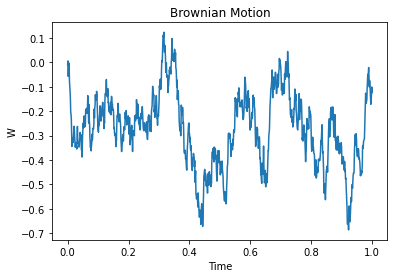

In [17]:
plt.plot(t, W)
plt.xlabel('Time')
plt.ylabel('W')
plt.title('Brownian Motion')
plt.show()

We just generate single brownian motion, feel free to generate many as we do below. As it is a random simulation, at each iteration, we will get a Brownian Motion with different path but with some characteristics.

## Stock Price Simulation  via Monte Carlo 

Now, we are ready to simulate stock price. To do that, we will use closing price of Apple and starting from the last element of the Apple stock, corresponding to `2022-04-30`, we start simulation:

In [23]:
import yfinance as yf

In [32]:
def stock_price_sim():
    apple_stock = yf.download('AAPL', '2021-01-01', '2022-04-30')
    apple_close = apple_stock['Close']
    S0 = apple_close[-1]
    mu = apple_close.pct_change().iloc[-252:].mean()/252
    sigma = apple_close.pct_change().iloc[-252:].std()/np.sqrt(252)
    T = 1.0
    N = 1000
    delta_t = T/N
    iterations = 500
    t = np.linspace(0., N*delta_t, N+1)
    time_steps = T/delta_t
    plt.figure(figsize=(10,6))
    for i in range(iterations):
        price_path = [S0]
        St = S0
        for j in range(int(time_steps)):
            St = St*np.exp((mu-0.5*sigma**2)*delta_t + sigma * np.sqrt(delta_t)*np.random.normal(0,1))
            price_path.append(St)
        plt.plot(t, price_path)
    plt.xlabel('Time Steps')
    plt.ylabel('Simulated Stock Prices')
    plt.show()
    return price_path       

[*********************100%***********************]  1 of 1 completed


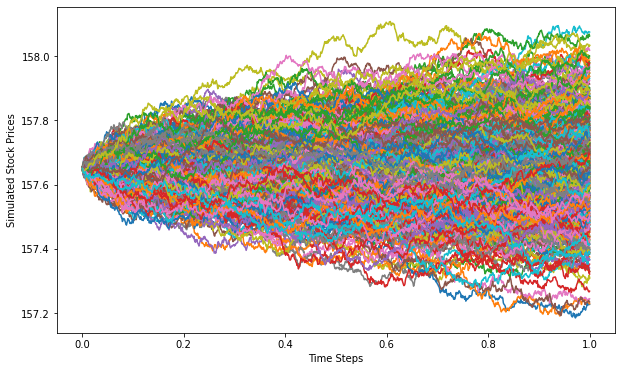

In [33]:
 price_path = stock_price_sim()

Here we have 500 different stock price simulation based on Monte Carlo technique. Each has different paths, while some exhibit upward trend, some others follow a downward trend.

Before wrapping up, let's briefly talk about the advantages and disadvantages of Monte Carlo Simulation:

**Advantages of Basic Monte Carlo Simulation**

1. Flexible and intuitive
2. Easy-to-apply 
3. Adjustable to the changing situation

**Disadvantages of Basic Monte Carlo Simulation**

1. Computational time: Dependent on the complexity of the problem the running time maybe long
2. Solutions are approximate and subject to number of iterations.

**Reference**

* Malvin H. Kalos, Paula A. Whitlock, Monte Carlo Methods, Wiley-VCH, 2008

Let us form our portfolio with random weight between 0 and 1:

In [47]:
stocks = ['AAPL', 'MSFT', 'IBM', 'T', 'MMM']
stock_price = yf.download(stocks, '2021-01-01', '2022-04-30', interval='1d')['Close']

[*********************100%***********************]  5 of 5 completed


In [48]:
returns = stock_price.pct_change()

In [49]:
weigths = np.random.random(len(stocks))
weigths /= np.sum(weigths)
weigths

array([0.19579195, 0.09570283, 0.23926293, 0.15288303, 0.31635926])

These weights are attached to related returns to calculate portfolio mean and standard deviation. So, now, we have learned how to derive weight. However, for a given set of securities, investors want to comprehend the risk-return possibilities. To this respect, having one weight per stock is far from being enough to get insight about the risk-return profile of a portfolio. How about applying Monte Carlo simulation?

Monte Carlo allows us to have large numbers of expected returns and expected standard deviations. All we need to do is to repeatedly generate weights and multiply them by mean and covariance matrix:

In [56]:
iterations = 1000
def portfolio_frontier(iterations, stocks):
    portfolio_exp_means = []
    portfolio_std_devs = []
    all_weights = []
    for i in range(iterations):
        weigths = np.random.random(len(stocks))
        weigths /= np.sum(weigths)
        all_weights.append(weigths)
        portfolio_exp_means.append(np.sum(returns.mean()*weigths)*252)
        portfolio_std_devs.append(np.sqrt(np.dot(weigths.T, np.dot(returns.cov()*252, weigths))))
    return portfolio_exp_means, portfolio_std_devs, all_weights

In [57]:
portfolio_exp_means, portfolio_std_devs, all_weights = portfolio_frontier(iterations, stocks)

In [62]:
portfolio_returns = np.array(portfolio_exp_means)
portfolio_std = np.array(portfolio_std_devs)

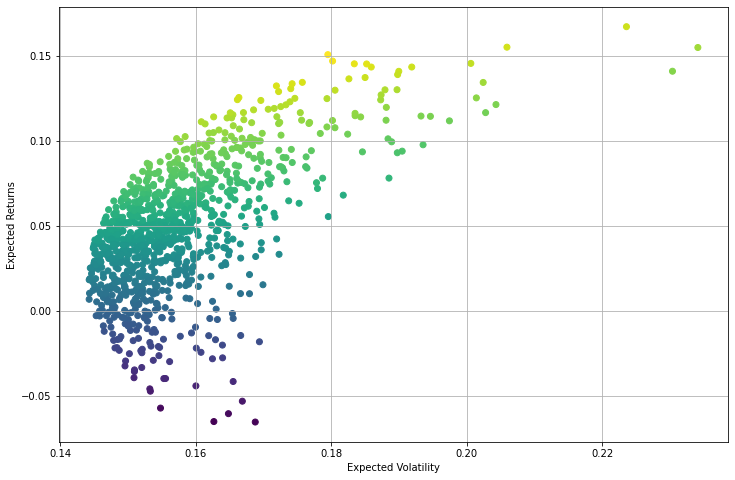

In [63]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_std, portfolio_returns, c=portfolio_returns/portfolio_std,
           marker = 'o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.show()

We have a nice visualization for sure but how can we know that which point provides best return-risk combination? This is where stock performance ratios come into the play. The most prominent ones are:
* Sharpe Ratio
* Treynor Ratio

`Sharpe` ratio is a method developed to gauge the risk-return combinations. In the numerator of the formula, portfolio return is subtracted from risk free rate and therefore it is known as risk-adjusted method. Shortly, it tells that given the volatility how much extra return investor receives. The formula is as follows:

$$\text{Sharpe ratio}=\frac{r_i-r_f}{\sigma(r_i)}$$

where $r_i$ is the $i^{th}$ stock return (or it can be portfolio return), $r_f$ is the risk free rate and finally $\sigma(r_i)$ is the standard deviation of $i^{th}$ stock. 

`Treynor` ratio, on the other hand, shows given the level of systematic risk, how much return an investor has. The formula of Treynor ratio is:

$$\text{Treynor ratio}=\frac{r_i-r_f}{\beta_i}$$

We will continue with Sharpe ratio. For the sake of simplicity, let us assume that risk free rate is zero and calculate Sharpe ratio:

In [64]:
sharpe = portfolio_returns / portfolio_std

In [66]:
print('Maximum Sharpe Ratio is {:.2f}'.format(sharpe.max()))

Maximum Sharpe Ratio is 0.84


In [67]:
sharpe.argmax()

401

In [71]:
import pandas as pd
df_vol = pd.DataFrame(portfolio_std_devs)
df_means = pd.DataFrame(portfolio_exp_means)
df_sharpe = pd.DataFrame(sharpe)

In [72]:
portfolio = pd.concat([df_vol, df_means, df_sharpe], axis=1)
portfolio.columns = ['Volatility', 'Returns', 'Sharpe']

In [74]:
max_sharpe = portfolio.iloc[portfolio['Sharpe'].idxmax()]
min_sharpe = portfolio.iloc[portfolio['Sharpe'].idxmin()]

In [75]:
max_sharpe

Volatility    0.179509
Returns       0.150692
Sharpe        0.839464
Name: 401, dtype: float64

In [76]:
min_sharpe

Volatility    0.162690
Returns      -0.064921
Sharpe       -0.399049
Name: 679, dtype: float64

Now, we can incorporate the Sharpe ratio to the risk-return plot given below as a `colorbar`, which provides us a scale so that we are able to evaluate the portfolio performance:

In [78]:
all_weights = portfolio_frontier(iterations, stocks)[2]
all_weights = np.array(all_weights)

Focusing on the Sharpe ratio, we observe that points with yellow colors have higher risk-return combinations. Now, let's locate the index of maximum return and standard deviation or volatility of the portfolio and assign black color, which gives us the optimal risk-return combination:

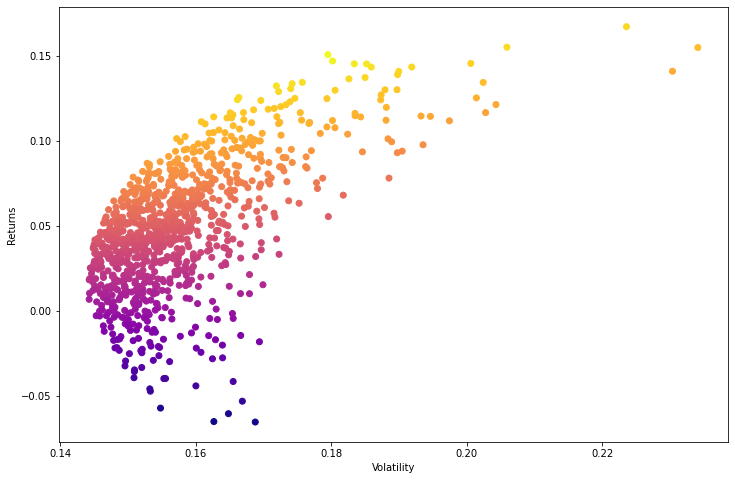

In [79]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_std, portfolio_returns, c=sharpe, cmap='plasma')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

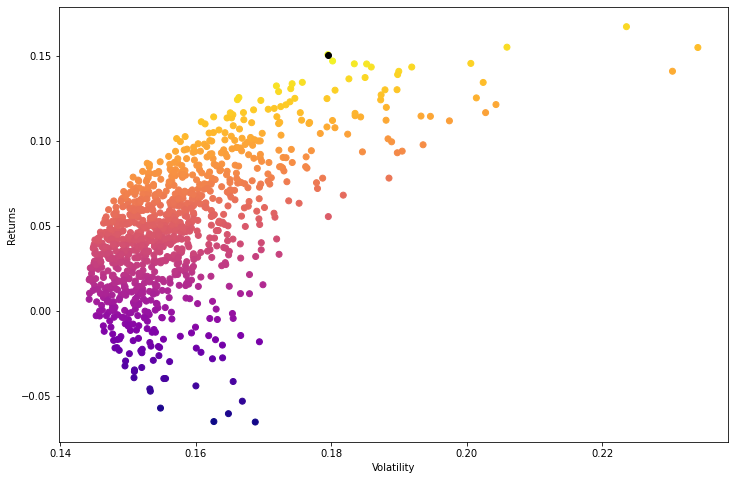

In [83]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_std, portfolio_returns, c=sharpe, cmap='plasma')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(max_sharpe[0],max_sharpe[1],c='black')
plt.show()

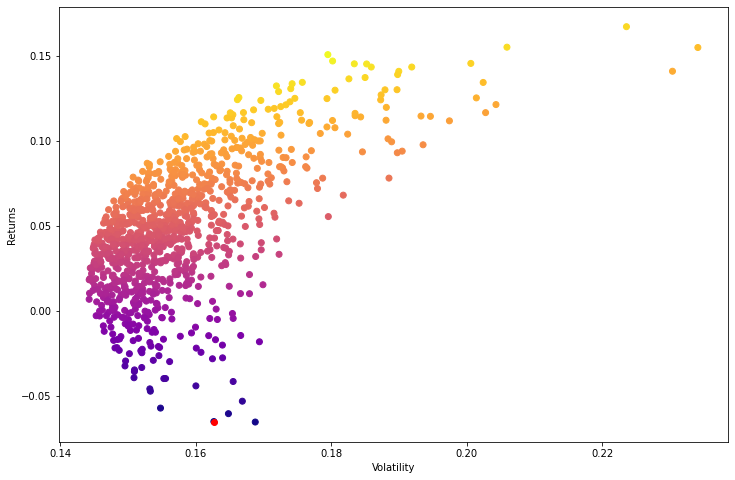

In [85]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_std, portfolio_returns, c=sharpe, cmap='plasma')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(min_sharpe[0],min_sharpe[1],c='red')
plt.show()

# Conclusion

Risk-return trade-off has been one of the most controversial topics in finance and Markowitz's Portfolio Theorem is one of the early and ground-breaking attempt to tackle this problem. Given the risk level, highest expected return is the optimal choice and to decide best performing stock or portfolio, Sharpe and Treynor ratios are easy-to-implement tools. This lesson tells us to decide which stock or portfolio beats the market and how we can calculate it via Python.